In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [ ]:
# rough
print(len(train_data))
print(len(test_data))

# 20% test_data out of total

print('total:', 8982+2246)
print('\n', train_data[10])
print(train_labels[10])

8982
2246
total: 11228

 [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
3


In [3]:
#Listing 3.14 - Encoding the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results                      # mistake was here

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
# rough
print(type(train_data))
print('', len(x_train))
print(len(x_test))
print(type(x_train))
# result contains same lengths and same type. Thats why vec
print('\n', (x_train[10]))
print(x_test[10])
print(len(x_train[10]))
print(len(x_test[10]))

<class 'numpy.ndarray'>
 8982
2246
<class 'numpy.ndarray'>

 [0. 1. 0. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]
10000
10000


In [4]:
# Vectorizing labels
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#Listing 3.15 - Model definition
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 55ms/step - loss: 2.7040 - accuracy: 0.5223 - val_loss: 1.7447 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4200 - accuracy: 0.7082 - val_loss: 1.2939 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0432 - accuracy: 0.7801 - val_loss: 1.1140 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8210 - accuracy: 0.8245 - val_loss: 1.0353 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 41ms/step - loss: 0.6549 - accuracy: 0.8591 - val_loss: 0.9701 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5233 - accuracy: 0.8899 - val_loss: 0.9271 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4244 - accuracy: 0.9121 - val_loss: 0.9086 - val_accuracy: 0.8070
Epoch 8/20
16

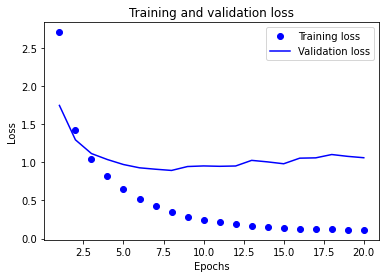

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

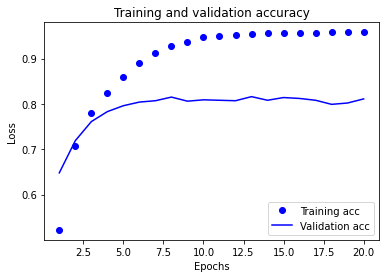

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Listing 3.21 - Retraining a model from scratch
# Now with 9 epochs only
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=9,                      # Attention!
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 2.6010 - accuracy: 0.5430 - val_loss: 1.6669 - val_accuracy: 0.6760
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 1.3596 - accuracy: 0.7290 - val_loss: 1.2615 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0039 - accuracy: 0.7920 - val_loss: 1.1015 - val_accuracy: 0.7680
Epoch 4/9
16/16 [==============================] - 1s 42ms/step - loss: 0.7861 - accuracy: 0.8348 - val_loss: 1.0238 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 1s 41ms/step - loss: 0.6304 - accuracy: 0.8688 - val_loss: 0.9541 - val_accuracy: 0.8010
Epoch 6/9
16/16 [==============================] - 1s 41ms/step - loss: 0.5034 - accuracy: 0.8946 - val_loss: 0.9354 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4073 - accuracy: 0.9157 - val_loss: 0.9170 - val_accuracy: 0.8080
Epoch 8/9
16/16 [===

In [ ]:
# Evaluate
results

[0.9682221412658691, 0.7898486256599426]

In [ ]:
# Accuracy is 79%

'''This approach reaches an accuracy of ~79%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:'''
pass

In [ ]:
# Calculating random baseline for multiclass classification to compare with our actual accuracy i.e. 79%
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)

print(np.array(test_labels) == np.array(test_labels_copy))
print(np.sum(np.array(test_labels) == np.array(test_labels_copy)))
print(len(np.array(test_labels) == np.array(test_labels_copy)))
print('percentage of accuracy:', end=' ')
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

[False False False ... False  True False]
413
2246
percentage of accuracy: 

0.18388245770258238

In [ ]:
len(test_labels)

2246

In [ ]:
predictions = model.predict(x_test)

print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0
3


In [ ]:
# 3.5.6 - A different way to handle the labels and the loss

''' If you cast the labels as integer tensor instead of one hot encoding
y_train = np.array(train_labels)
y_test = np.array(test_labels)
With integer labels, you should use sparse_categorical_crossentropy

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

This new loss function is still mathematically the same.
'''
pass

In [ ]:
#Listing 3.23 A model with an information bottleneck
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 17ms/step - loss: 2.6010 - accuracy: 0.4203 - val_loss: 1.8953 - val_accuracy: 0.5670
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 1.6736 - accuracy: 0.5958 - val_loss: 1.5877 - val_accuracy: 0.6080
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.4189 - accuracy: 0.6179 - val_loss: 1.5030 - val_accuracy: 0.6050
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2320 - accuracy: 0.6412 - val_loss: 1.3762 - val_accuracy: 0.6300
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.0776 - accuracy: 0.6885 - val_loss: 1.3253 - val_accuracy: 0.6750
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9552 - accuracy: 0.7476 - val_loss: 1.3018 - val_accuracy: 0.7040
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 0.8613 - accuracy: 0.7714 - val_loss: 1.3076 - val_accuracy: 0.7120
Epoch 8/20
63

In [ ]:
# 71% validation accuracy when applying the bottleneck.

Further Experiments

In [ ]:
# Load data and do preprocessing

In [6]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Default size of layers are: 64,64,46 where the accuracy is 79%
# default no. of epochs: 8 or 9
# Experiments:
# 64,46,46
# 128,64,46 ===> 80% accuracy
# 64,46 ===> 79.6%
# 128,96,64,46
# 128,64,64,46
# 64,64,64,46
# 96,96,64,46
# 96,96,96,46 ===> very variable result and low result

# 64,64,64,64,46
# 128,96,64,64,46 ===> very variable and low result

In [58]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(96, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=8,                      # Attention!
batch_size=512,
validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 74ms/step - loss: 2.5408 - accuracy: 0.4198 - val_loss: 1.6808 - val_accuracy: 0.6210
Epoch 2/8
16/16 [==============================] - 1s 66ms/step - loss: 1.4330 - accuracy: 0.6619 - val_loss: 1.3506 - val_accuracy: 0.6860
Epoch 3/8
16/16 [==============================] - 1s 66ms/step - loss: 1.0771 - accuracy: 0.7497 - val_loss: 1.2391 - val_accuracy: 0.7200
Epoch 4/8
16/16 [==============================] - 1s 66ms/step - loss: 0.8324 - accuracy: 0.8014 - val_loss: 1.0769 - val_accuracy: 0.7700
Epoch 5/8
16/16 [==============================] - 1s 66ms/step - loss: 0.6336 - accuracy: 0.8489 - val_loss: 1.2819 - val_accuracy: 0.7280
Epoch 6/8
16/16 [==============================] - 1s 67ms/step - loss: 0.5066 - accuracy: 0.8787 - val_loss: 1.0550 - val_accuracy: 0.7900
Epoch 7/8
16/16 [==============================] - 1s 67ms/step - loss: 0.3882 - accuracy: 0.9123 - val_loss: 1.4903 - val_accuracy: 0.6790
Epoch 8/8
71/71 [===

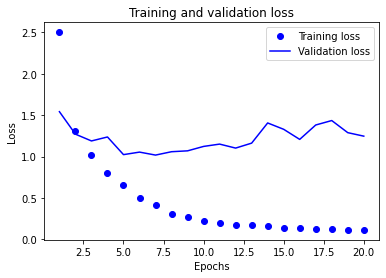

In [51]:
# Graph:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

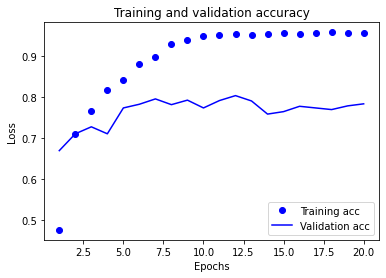

In [52]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ALHAMDULILLAH DONE